In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv')


In [2]:

#Inspect the data characteristics
#Print the first five rows of the DataFrame
print(marketing.head())
#Print the data information
print(marketing.info())
# Print the statistics of all columns
print(marketing.describe())




   Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0      2018-01-01           NaN           House Ads         True  0

In [3]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool
bool


In [4]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [5]:
# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

In [6]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', 
parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [7]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


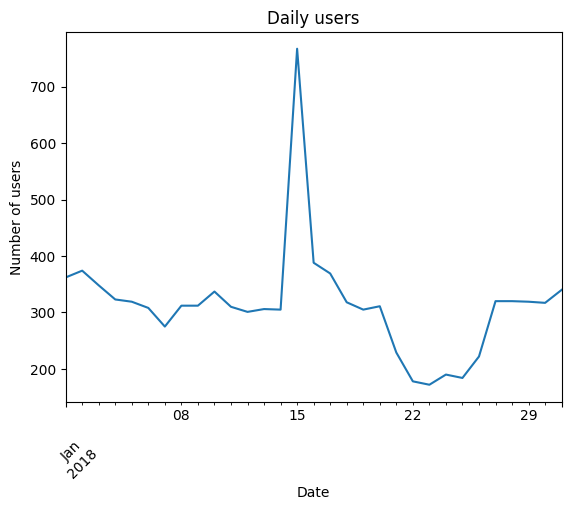

In [8]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xlabel('Date')
plt.xticks(rotation =45)

# Display the plot
plt.show()

In [9]:
#Measure the campaign's success using conversion rate
#Conversion rate = No of people who convert/ Total number of people we marketed to 
# Retention rate= No of people who remained subscribed/ Total number of people who converted
#Calculate the number of people who subscribed 
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

#Calculate the number of people we marketed to
total= marketing['user_id'].nunique()

#Calculate the conversion rate
conversion_rate= total_subscribers/total
print(round(conversion_rate * 100, 2), "%")



14.09 %


In [10]:
#Now calculate the retention rate
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"]== True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']== True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

676.41 %


In [11]:
# Customer Segmentation by House Ads 
#Check retention rate for users who converted using only House Ads
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']
retained_hads = house_ads[house_ads['is_retained']== True]['user_id'].nunique()
subscribers= house_ads[house_ads['converted']== True]['user_id'].nunique()

retention_rate = retained_hads/ subscribers
print(round(retention_rate*100, 2), '%')

58.05 %


In [12]:
#Customer Segmentation by Language(English)
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English'] 

# Calculate the total number of English speaking users
total_eng = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers_eng = english_speakers[english_speakers['converted']== True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers_eng/total_eng
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: language_displayed
English    13.13
Name: user_id, dtype: float64 %


In [13]:
#Grouping by subscribing_channel and calculate retention
retained_sc = marketing[marketing['is_retained']== True].groupby(['subscribing_channel'])['user_id'].nunique()
print(retained_sc)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [14]:
# Group by subscribing_channel and calculate subscribers
subscribers_sc= marketing[marketing['converted']== True].groupby(['subscribing_channel'])['user_id'].nunique()
print(subscribers_sc)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [15]:
#Calculate the retention rate across the DataFrame 
channel_retention_rate = (retained_sc/subscribers_sc)*100
print(channel_retention_rate)


subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


In [16]:

# Group by language_displayed and count unique users
total_lang = marketing.groupby(['language_displayed'])\
                    ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers_lang= marketing[marketing['converted'] == True]\
                            .groupby(['language_displayed'])\
                            ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers_lang/total_lang
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [17]:
# Group by date_served and count unique users
total_users_by_date_served = marketing.groupby(['date_served'])['user_id'].nunique()
total_users_by_date_subscribed = marketing.groupby(['date_subscribed'])['user_id'].nunique()


# Group by date_subscribed and count unique converted users
subscribers_date= marketing[marketing['converted']== True].groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count subscriber quality 
retained_by_date= marketing[marketing['is_retained']== True].groupby(['date_subscribed'])['user_id'].nunique()


# Calculate the conversion rate per day
daily_conversion_rate = subscribers_date/total_users_by_date_served
print(daily_conversion_rate)

#Calculate the subscriber quality across dates
daily_retention_rate = retained_by_date/total_users_by_date_subscribed
print(daily_retention_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64
date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927

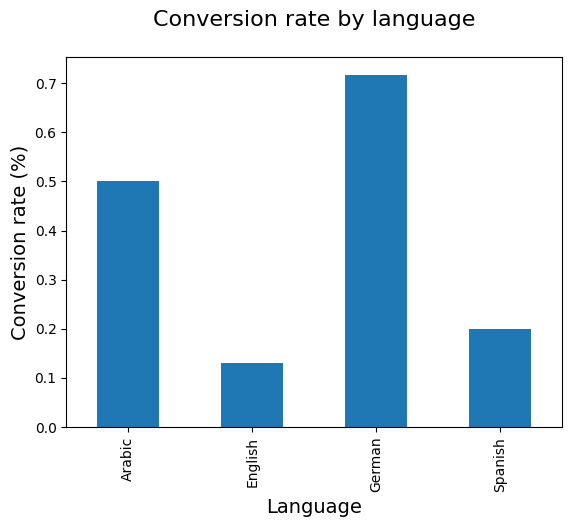

In [18]:
# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind= 'bar')

#Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size=16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

#Displaying the plot
plt.show()

In [19]:
# Prepare data to plot the daily retention rate 
#Reset index to turn the Series into a DataFrame

daily_retention_rate= pd.DataFrame(daily_retention_rate.reset_index())

#Rename columns
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']

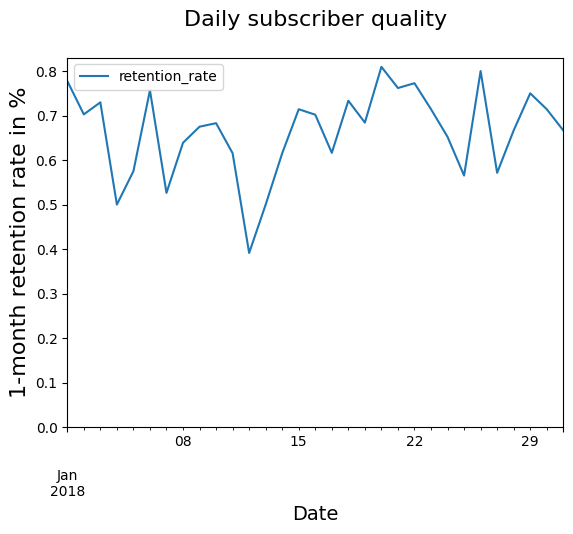

In [20]:
#Visualizing the data trend over time
# Create a line chart using daily_retention DF

daily_retention_rate.plot('date_subscribed','retention_rate')

#Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate in %', size = 16)
plt.xlabel('Date', size = 14)

#Ste the y-axis to begin at 0
plt.ylim(0)

#Displaying the plot
plt.show()

In [21]:
# Prepare data to plot the daily conversion rate 
#Reset index to turn the Series into a DataFrame

daily_conversion_rate= pd.DataFrame(daily_conversion_rate.reset_index())

#Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

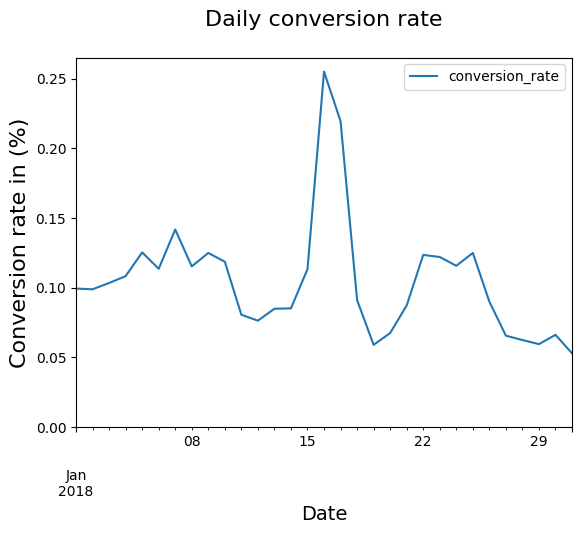

In [22]:
#Visualizing the daily conversion rate 
# Create a line chart using daily_conversion rate DF

daily_conversion_rate.plot('date_served','conversion_rate')

#Add a title and x and y-axis labels
plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate in (%)', size = 16)
plt.xlabel('Date', size = 14)

#Ste the y-axis to begin at 0
plt.ylim(0)

#Displaying the plot
plt.show()

In [23]:
# Group the data by date, language preferred and count 

language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()
language_df= pd.DataFrame(language.unstack(level=1))
print(language_df.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


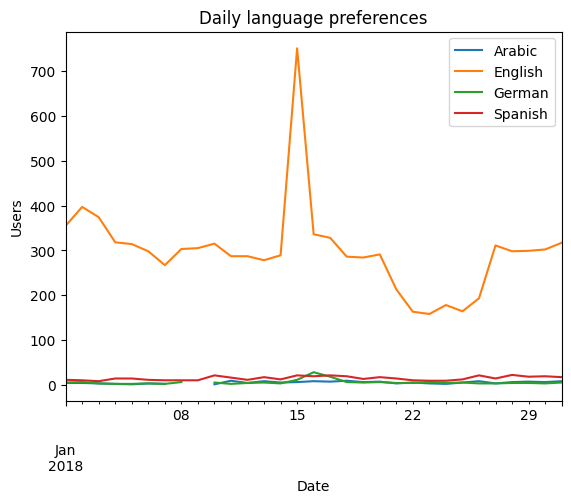

In [24]:
language_df.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc ='upper right', labels = language_df.columns.values)

plt.show()

In [25]:
# Grouping the data by Age and preferred language 
language_age= marketing.groupby(['language_preferred', 'age_group'])['user_id'].count()
language_age= pd.DataFrame(language_age.unstack(level= 1))
print(language_age.head())

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      31           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


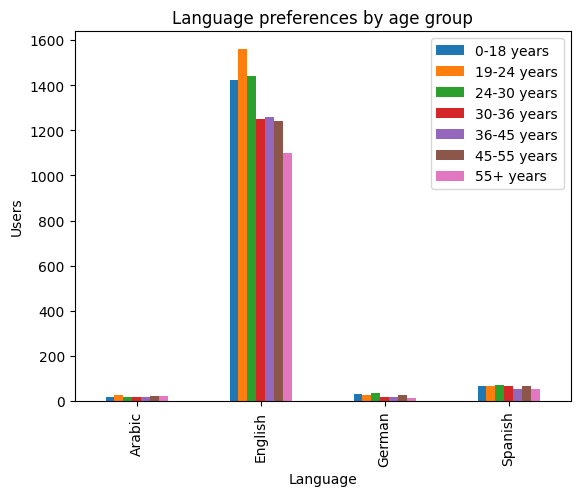

In [26]:
#Plotting a bar chart for language preferences by age group
language_age.plot(kind= 'bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc= 'upper right', labels = language_age.columns.values)
plt.show()

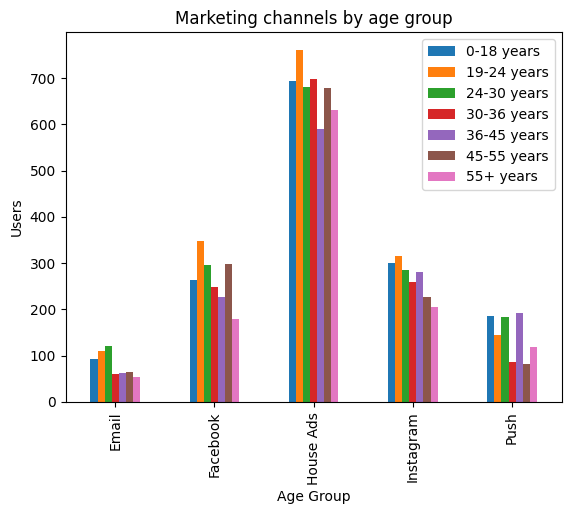

In [27]:

#Grouping the data by Age and marketing channel 
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df= pd.DataFrame(channel_age.unstack(level=1))

# Plot channel_age
channel_age_df.plot(kind= 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', labels = channel_age_df.columns.values)
plt.show()

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


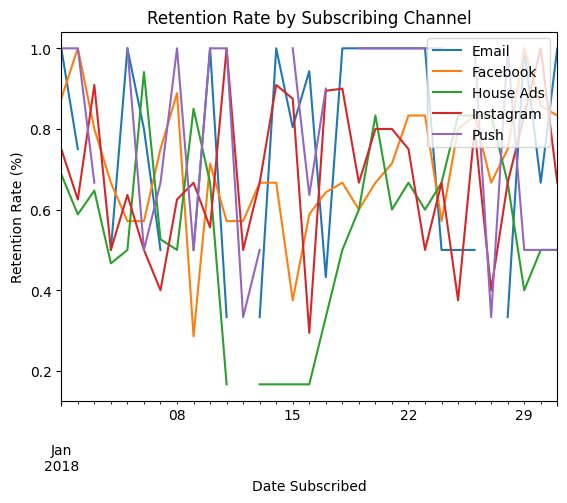

In [28]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

# Analyzing the retention rate for the campaign based on channels

# Divide retained subscribers by total subscribers

retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc= 'upper right', labels = retention_rate_df.columns.values)
plt.show()


In [29]:

#Create a function
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']== True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


<Figure size 800x600 with 0 Axes>

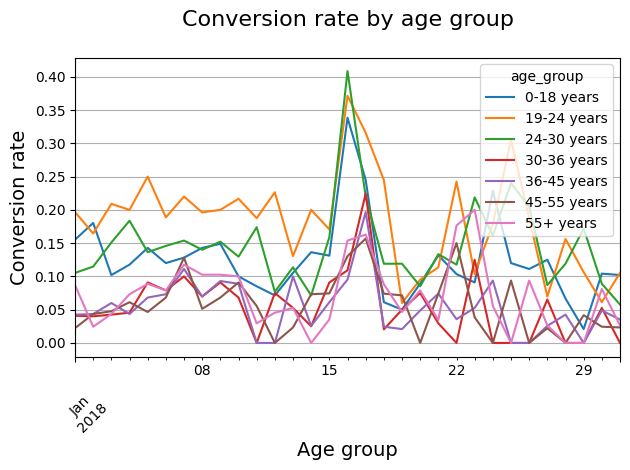

In [30]:
# Calculate conversion rate by age_group and date served
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Visualize conversion by age_group
plt.figure(figsize=(8, 6))  # Set figure size for better visualization

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [31]:

def plotting_conv(dataframe):
    #Plotting function for conversion rate across different Age groups
    age_groups= dataframe.columns
    
    #Set up colors for better distinction
    
    colors = ['blue', 'red', 'yellow', 'indigo', 'violet', 'green', 'orange']
    for idx, age in enumerate(age_groups):
        plt.figure(figsize= (8,6)) #Set figure size for each age group
        plt.plot(dataframe.index, dataframe[age], marker='o', color=colors[idx], label =age)
        plt.title(f'Daily {age} conversion rate\n', size=16)
        plt.ylabel('Conversion rate (%)', size=14)
        plt.xlabel('Date', size=14)
        plt.xticks(rotation=45)
        plt.yticks(size=10)
        plt.legend() # Add legend to differentiate age groups
        plt.tight_layout()
        plt.show()
        plt.clf()


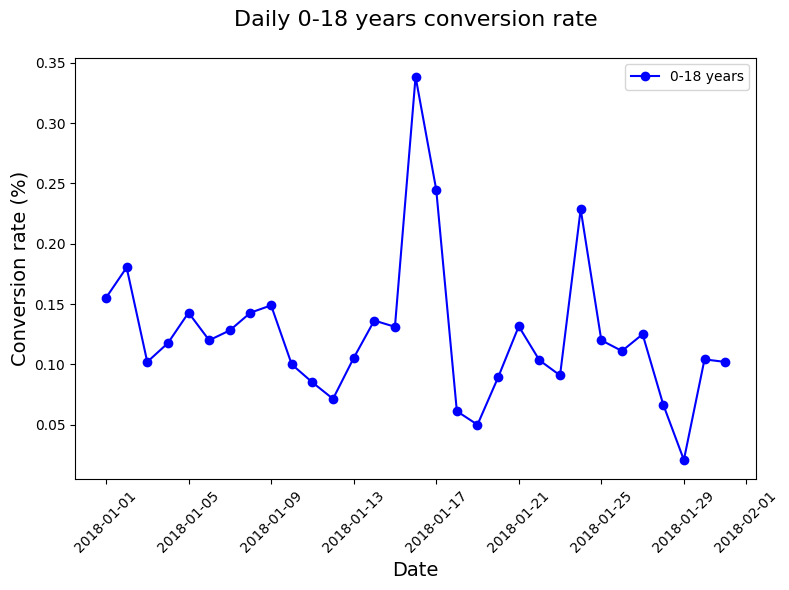

<Figure size 640x480 with 0 Axes>

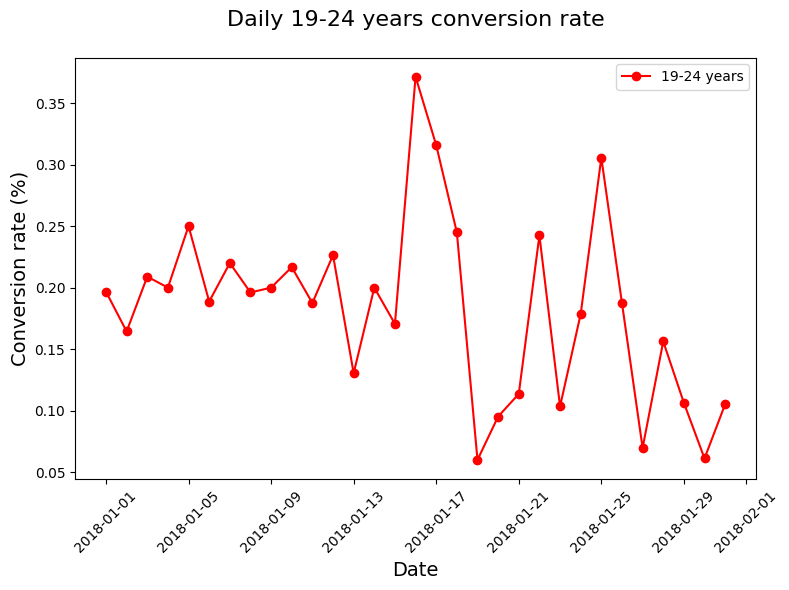

<Figure size 640x480 with 0 Axes>

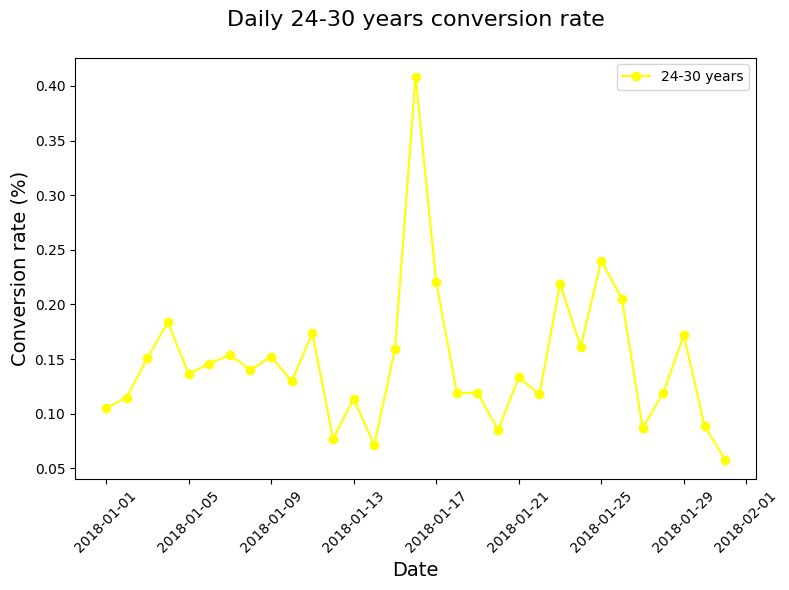

<Figure size 640x480 with 0 Axes>

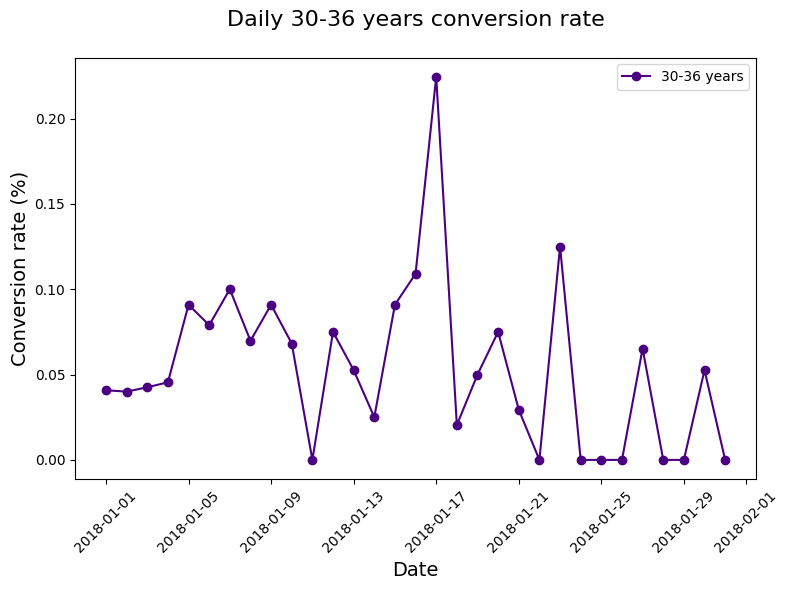

<Figure size 640x480 with 0 Axes>

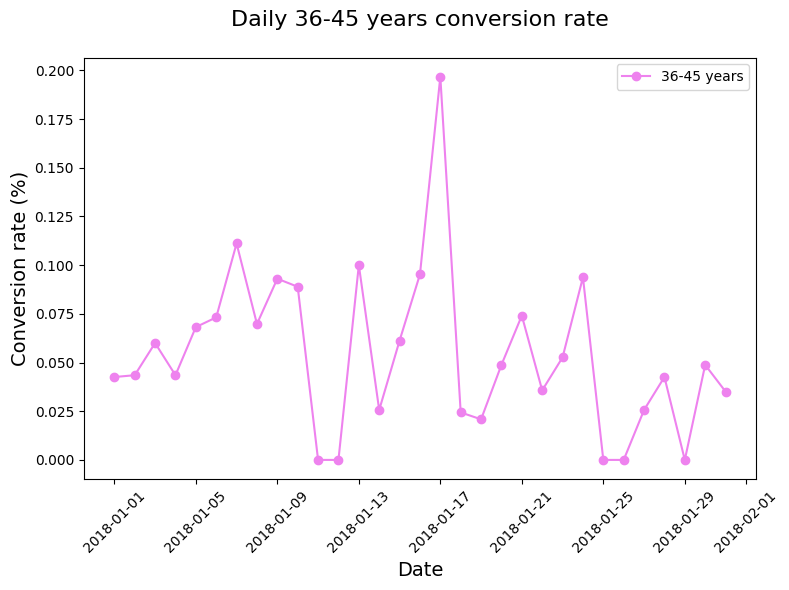

<Figure size 640x480 with 0 Axes>

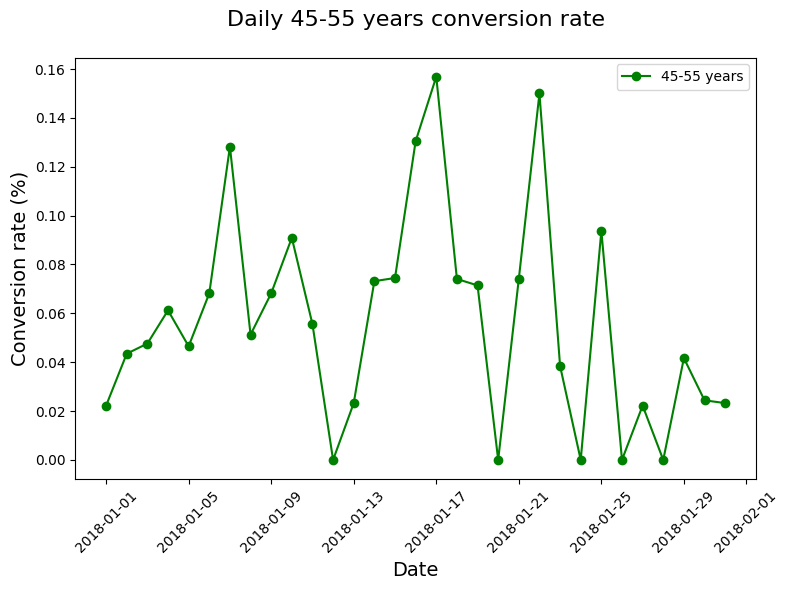

<Figure size 640x480 with 0 Axes>

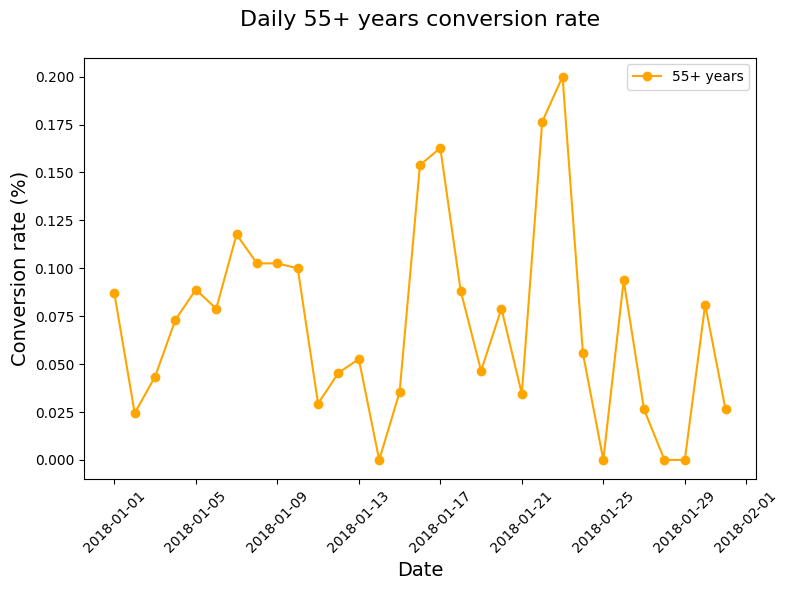

<Figure size 640x480 with 0 Axes>

In [32]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

In [33]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


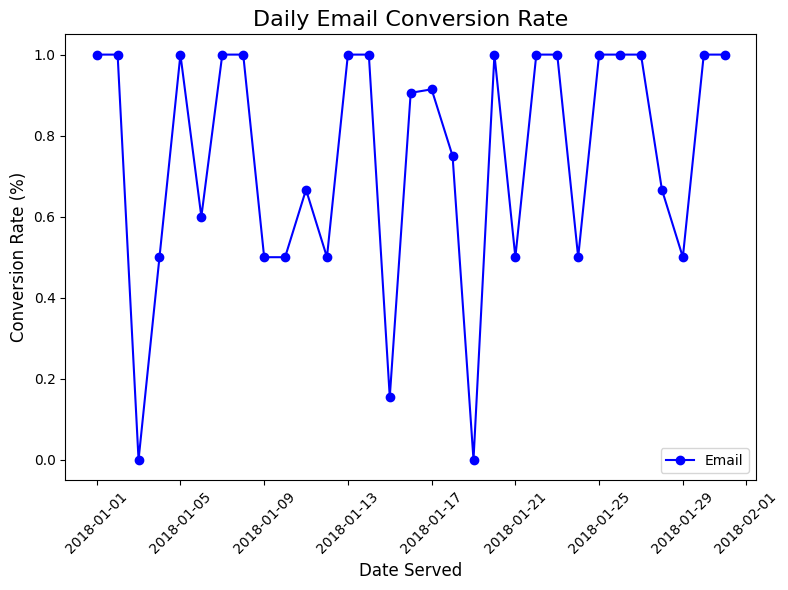

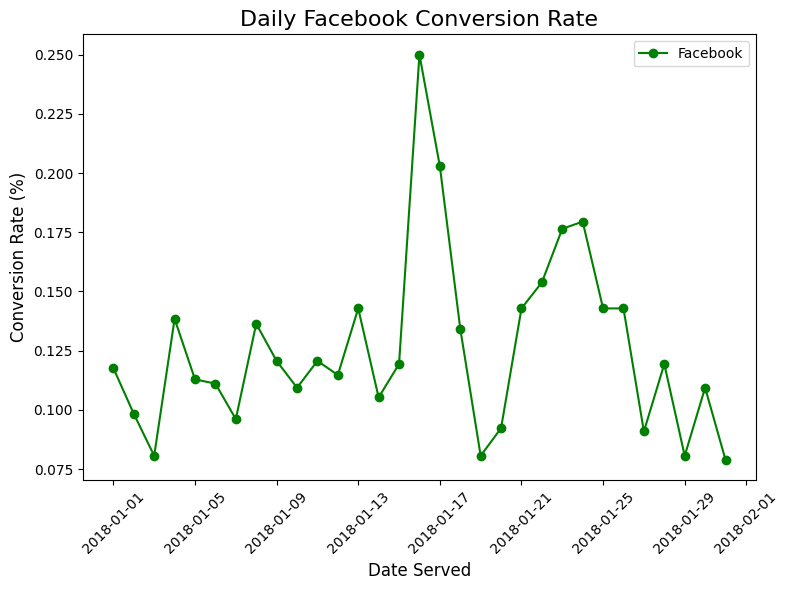

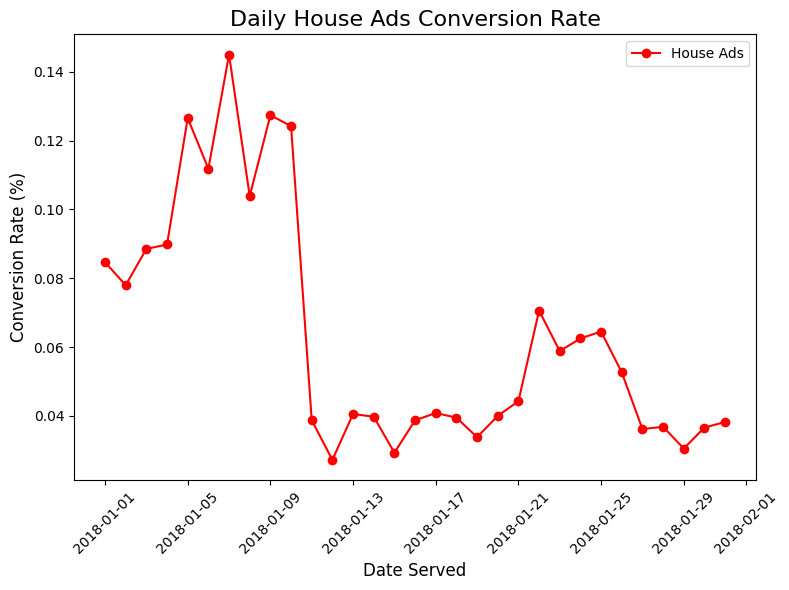

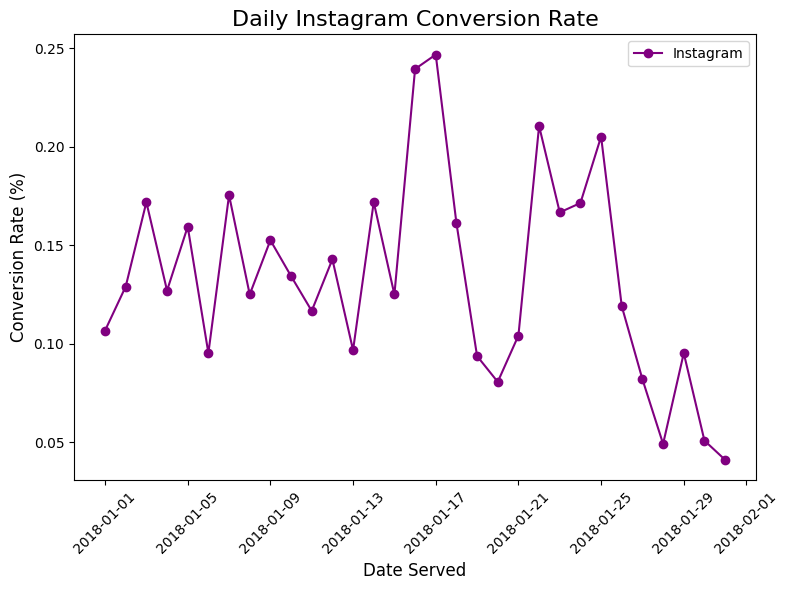

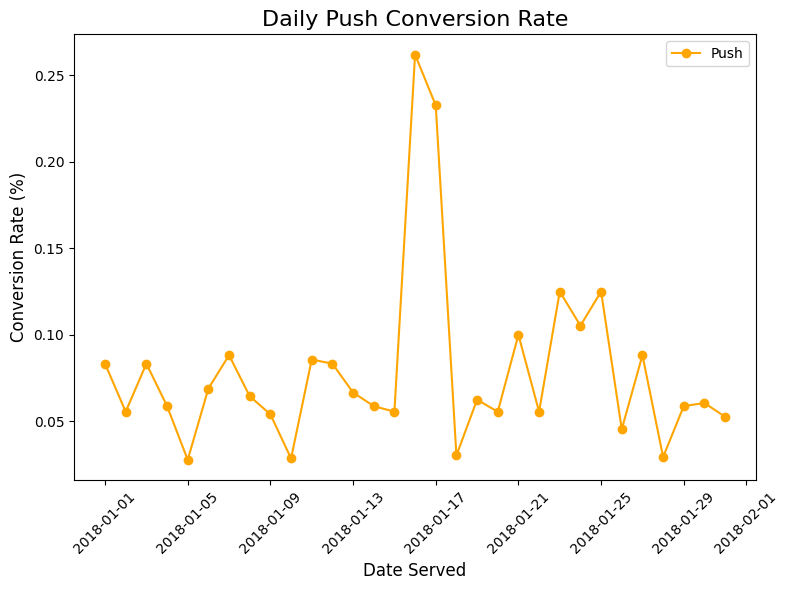

In [34]:

def plotting_channel_conv(dataframe):
    # Plotting function for each marketing channel and their conversion rate 
    channels = dataframe.columns
    
    # Set up colors for better distinction
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    
    for idx, channel in enumerate(channels):
        plt.figure(figsize=(8, 6))  # Set figure size for each channel
        plt.plot(dataframe.index, dataframe[channel], marker='o', color=colors[idx], label=channel)
        plt.title(f'Daily {channel} Conversion Rate', size=16)
        plt.ylabel('Conversion Rate (%)', size=12)
        plt.xlabel('Date Served', size=12)
        plt.xticks(rotation=45)
        plt.yticks(size=10)
        plt.legend()  # Add legend to differentiate channels
        plt.tight_layout()
        plt.show()

# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level=1))

# Plot results of daily_conv_channel using the enhanced plotting function
plotting_channel_conv(daily_conv_channel)


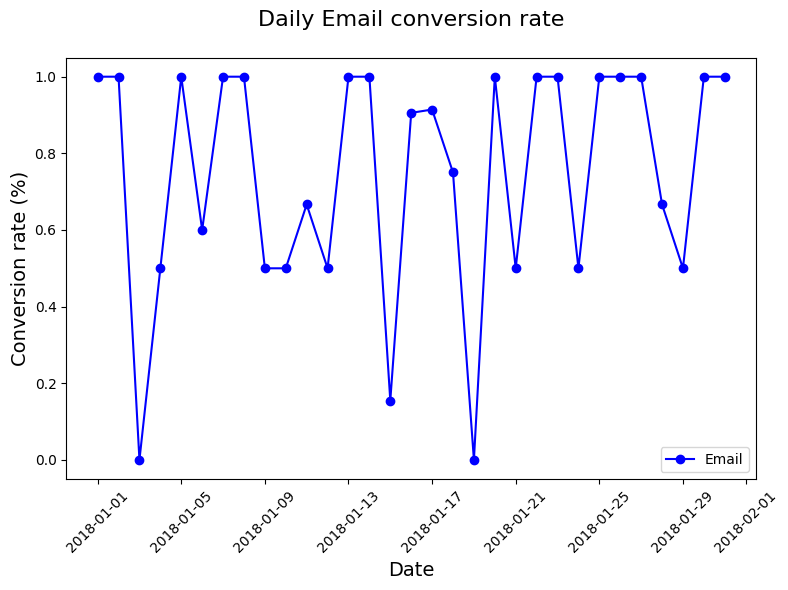

<Figure size 640x480 with 0 Axes>

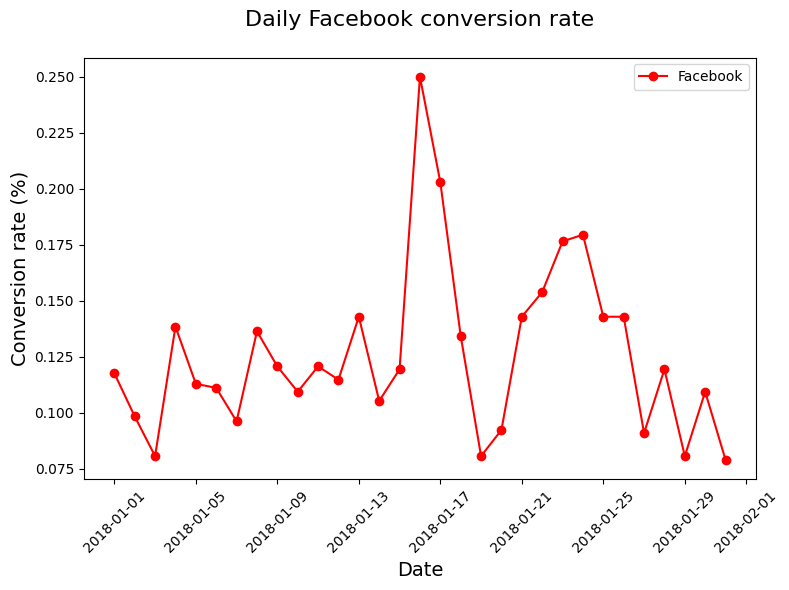

<Figure size 640x480 with 0 Axes>

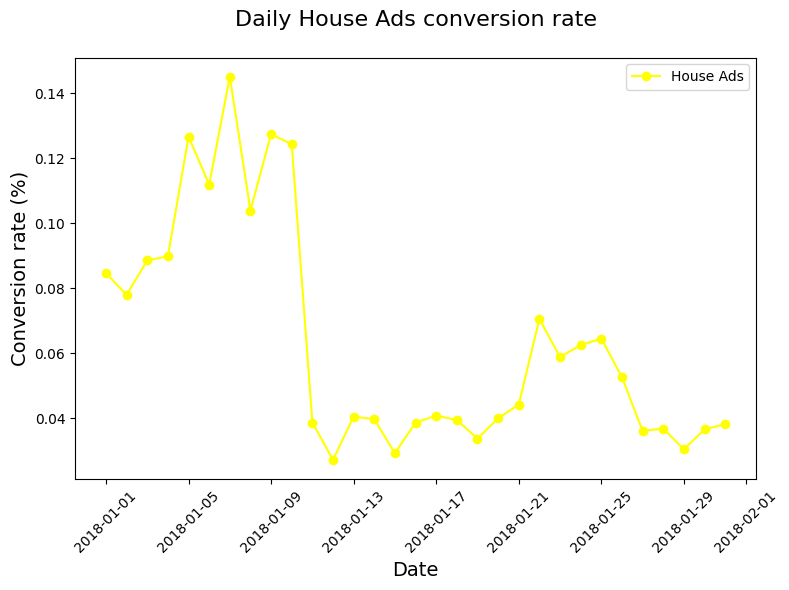

<Figure size 640x480 with 0 Axes>

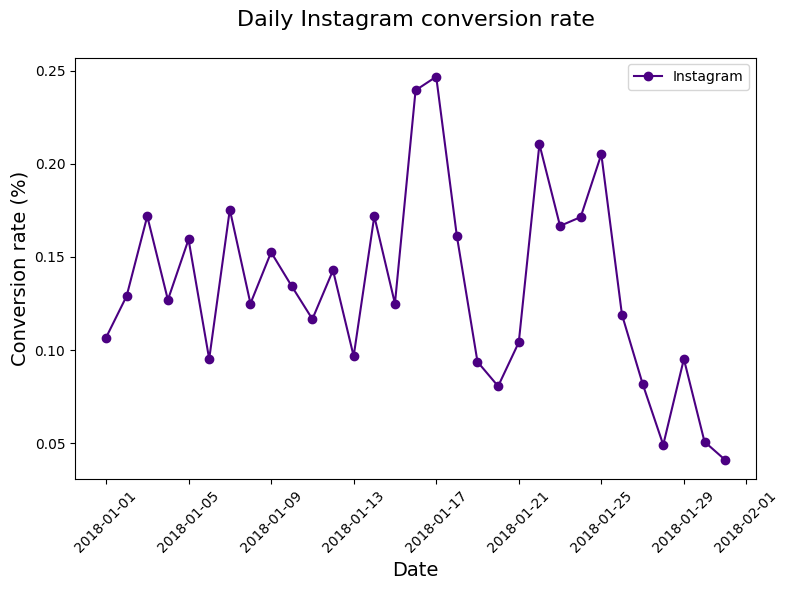

<Figure size 640x480 with 0 Axes>

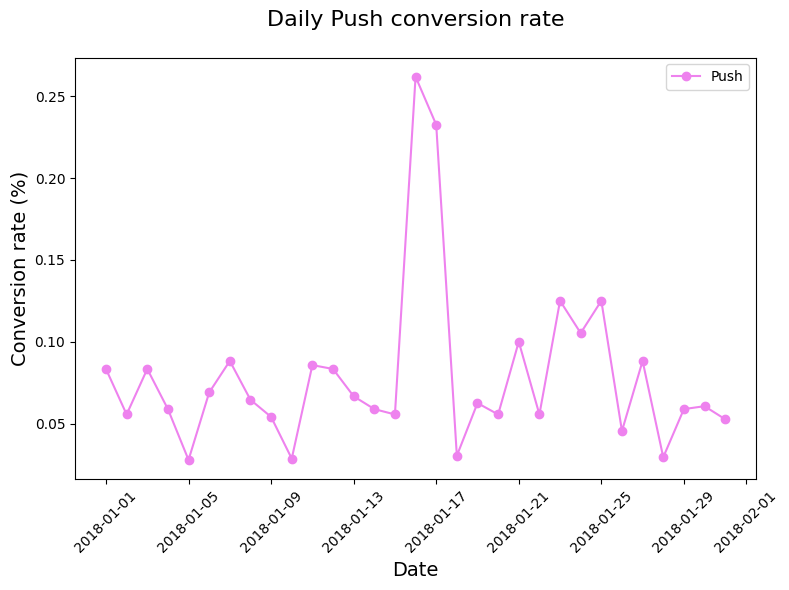

<Figure size 640x480 with 0 Axes>

In [35]:


def plotting_channel_conv(dataframe):
    #Plotting function for individual marketing channel conversion rate 
    channels= dataframe.columns
    
    for channel in channels:
        plt.figure(figsize=(10,6)) # Set figure size for each channel
        plt.plot(dataframe.index, dataframe[channel], marker= 'o')
        plt.title(f'Daily {channel} conversion rate', size= 16)
        plt.ylabel('Conversion Rate in (%)', size= 12)
        plt.xlabel('Date Served', size= 12)
        plt.xticks(rotation= 45)
        plt.yticks(size=10)
        plt.grid(True) # Add gridlines for better reference 
        plt.legend()
        plt.tight_layout()
        plt.show()

# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

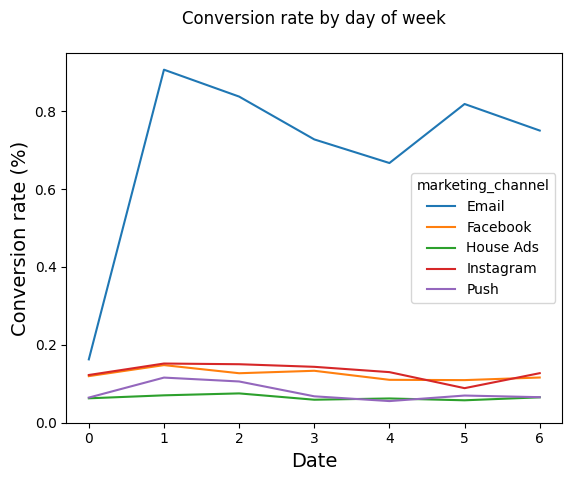

In [36]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week and marketing channel
DoW_conversion = conversion_rate(marketing,['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)
plt.ylim(0) #Set y-axis to begin at 0
plt.show()

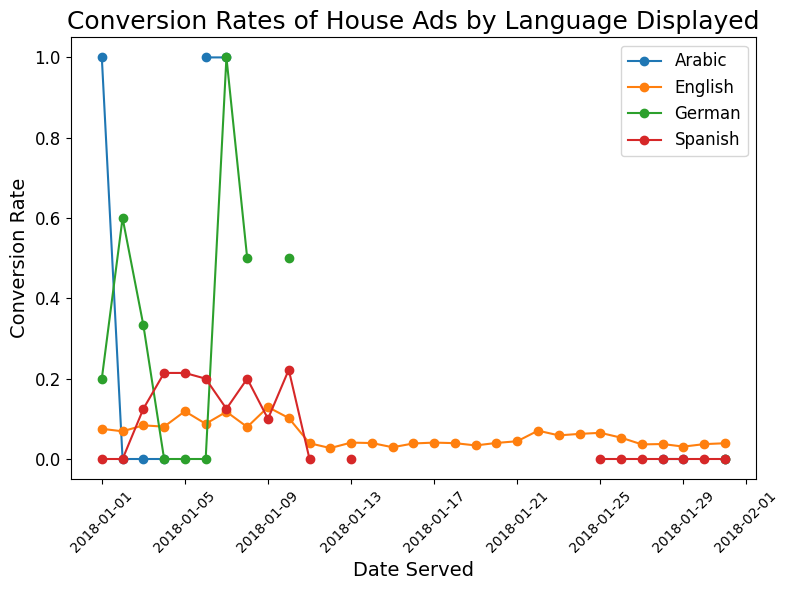

In [37]:
def plotting_conv(dataframe):
    # Plotting function for conversion rates
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot each language's conversion rate
    for language in dataframe.columns:
        plt.plot(dataframe.index, dataframe[language], marker='o', label=language)

    plt.title('Conversion Rates of House Ads by Language Displayed', size=18)
    plt.ylabel('Conversion Rate', size=14)
    plt.xlabel('Date Served', size=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.yticks(size=12)
    plt.legend(loc='best', fontsize=12)
    #plt.grid(True)  # Add gridlines for better reference
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

# Check the reason for decreasing House Ads across culture by using language
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use the improved plotting function to display results
plotting_conv(conv_lang_df)


In [38]:
def plotting_individual_lang_conv(dataframe):
    # Plotting function for individual language conversion rates
    languages = dataframe.columns

    for language in languages:
        plt.figure(figsize=(8, 6))  # Set figure size for each language
        plt.plot(dataframe.index, dataframe[language], marker='o')
        plt.title(f'Conversion Rate of House Ads for {language}', size=16)
        plt.ylabel('Conversion Rate', size=12)
        plt.xlabel('Date Served', size=12)
        plt.xticks(rotation=45)
        plt.yticks(size=10)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Check the reason for decreasing House Ads across culture by using language
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use the improved plotting function to display individual language plots
plotting_individual_conv(conv_lang_df)


NameError: name 'plotting_individual_conv' is not defined

In [ ]:
# Add the new column is_correct_lang using .loc
house_ads.loc[house_ads['language_preferred'] == house_ads['language_displayed'], 'is_correct_lang'] = 'Yes'
house_ads.loc[house_ads['language_preferred'] != house_ads['language_displayed'], 'is_correct_lang'] = 'No'

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)


is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


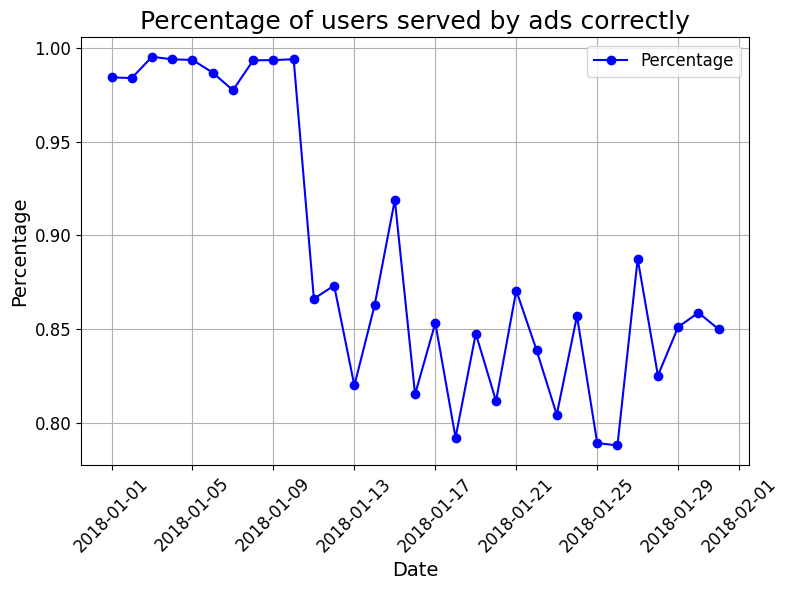

In [ ]:

# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes'] / language_check_df.sum(axis=1)

# Plot and show your results
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.plot(pd.to_datetime(language_check_df.index), language_check_df['pct'], marker='o', linestyle='-', color='b', label='Percentage')

plt.title('Percentage of users served by ads correctly', size=18)
plt.ylabel('Percentage', size=14)
plt.xlabel('Date', size=14)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)  # Add gridlines for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


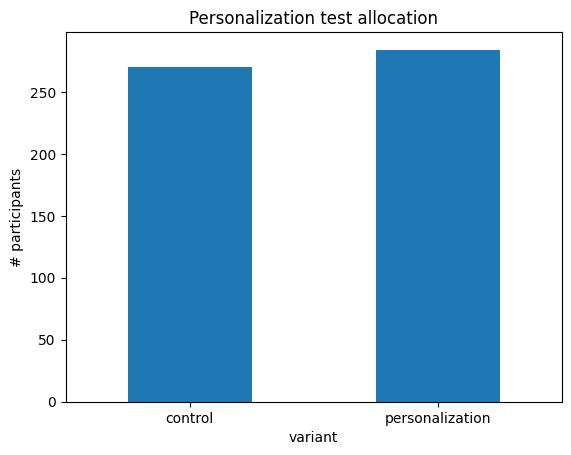

In [39]:
#AB Testing 
email= marketing[marketing['marketing_channel']=='Email']
allocation = email.groupby(['variant'])['user_id'].nunique()

allocation.plot(kind='bar')
plt.title('Personalization test allocation')
plt.xticks(rotation =0)
plt.ylabel('# participants')
plt.show()



In [43]:
# Setting up the data to evaluate the test
# Group by user_id and variant

subscribers= email.groupby(['user_id', 'variant'])['converted'].max()
subscribers_df= pd.DataFrame(subscribers.unstack(level=1))

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from personalization column
personalization = subscribers_df['personalization'].dropna()


print("Control conversion rate:", np.mean(control))

print("Personalization conversion rate:", np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [1]:
# Calculate the mean of a and b
a_mean = np.mean(control)
b_mean = np.mean(personalization)

#Calculate the lift using a_mean and b_mean
lift = (b_mean - a_mean)/a_mean
print("lift:", str(round(lift*100, 2)) + '%')

NameError: name 'np' is not defined